# Gaze Estimation Analysis

In [36]:
#We load the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['agg.path.chunksize'] = 0
mpl.rcParams.update( mpl.rc_params() )
plt.rcParams.update({'font.size': 11})
#plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': 'bold'})
plt.rc('font', family='serif')

## We load the data

In [19]:
df = pd.read_csv('../data/dataset_balanced_gaze_v3.csv')
df

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,AgeLow,AgeHigh,Gender,GenderConf,Size,openface_key,openpose_jsons_path,openpose_images_path,eye_gazing_features,overall_confidence
0,_REVIEWED/Testing_ProcessComplete/matt_savage@...,matt_savage@sbcglobal.net__Easton,0,5.0,Male,89.1,30.0,360.0,480.0,99.2,...,6.9,14.4,Male,90.5,0.030015,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,"[[0.229258, -0.086175, -0.969543, 0.069048, -0...",0.855714
1,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,sourire_4me2@att.net__Gabriella,1,11.0,Female,89.1,24.0,360.0,480.0,99.8,...,20.6,28.8,Female,97.6,0.046882,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,"[[0.24689499999999998, -0.000195, -0.969042, 0...",0.880000
2,_REVIEWED/Testing_ProcessComplete/odaliscorder...,odaliscordero@gmail.com__Sarah,0,2.0,Female,88.6,25.0,360.0,480.0,99.0,...,2.6,9.2,Female,98.5,0.185876,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,"[[-0.396104, 0.162703, -0.903676, -0.558342, 0...",0.958966
3,annaseemayer@yahoo.co.uk/1591439040/GuessWhat.mp4,annaseemayer@yahoo.co.uk__Catherine,0,7.0,Female,94.6,25.0,360.0,480.0,99.1,...,32.2,40.0,Female,99.4,0.284316,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,"[[0.145224, -0.29078899999999996, -0.945702, -...",0.921034
4,tami_mcin@hotmail.com/1587233613/GuessWhat.mp4,tami_mcin@hotmail.com__Adrian,1,7.0,Male,107.5,25.0,360.0,480.0,99.9,...,10.7,18.8,Male,94.0,0.250136,GuessWhat/tami_mcin@hotmail.com/1587233613/Ope...,GuessWhat/tami_mcin@hotmail.com/1587233613/jsons/,GuessWhat/tami_mcin@hotmail.com/1587233613/ima...,"[[0.23503800000000002, -0.148624, -0.960556, -...",0.934898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,_REVIEWED/remote_participants/anamontejo%40yah...,anamontejo@yahoo.com.au__Toben,1,6.0,Male,87.3,23.8,720.0,960.0,99.2,...,9.4,16.5,Female,87.5,0.094710,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,"[[0.163576, 0.104179, -0.981015, 0.02110399999...",0.911923
292,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,psidhu15@gmail.com__eshar,0,3.0,Female,86.9,30.0,768.0,1024.0,99.9,...,3.8,10.3,Female,98.2,0.111147,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,"[[0.394483, -0.12995299999999999, -0.909668, 0...",0.944359
293,mrspaine%40yahoo.com/1637525368746/GuessWhat.mp4,mrspaine@yahoo.com__Eden,1,8.0,Female,57.6,29.9,480.0,640.0,100.0,...,11.3,18.6,Female,98.8,0.176444,mrspaine%40yahoo.com/1637525368746/OpenFace.csv,mrspaine%40yahoo.com/1637525368746/jsons/,mrspaine%40yahoo.com/1637525368746/images/,"[[-0.12941, -0.232519, -0.963944, -0.246883, -...",0.936296
294,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,vesna_tz@yahoo.com__Filip,0,2.0,Male,89.2,24.0,360.0,480.0,99.5,...,3.3,8.6,Male,92.7,0.218223,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,"[[0.045269, -0.004028, -0.998967, -0.172559, -...",0.898000


# Eye Gazing Features : Length

Not all videos have eye gazing features. They don't have the same number of frames.

In [20]:
#We visualize the length of the eye gazing features (ie. for how many frames did we manage to collect eye gazing features)
df['length'] = df['eye_gazing_features'].apply(eval).apply(len)
#Drop the rows where the length is 0
df = df[df['length'] != 0]
df

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,AgeHigh,Gender,GenderConf,Size,openface_key,openpose_jsons_path,openpose_images_path,eye_gazing_features,overall_confidence,length
0,_REVIEWED/Testing_ProcessComplete/matt_savage@...,matt_savage@sbcglobal.net__Easton,0,5.0,Male,89.1,30.0,360.0,480.0,99.2,...,14.4,Male,90.5,0.030015,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,"[[0.229258, -0.086175, -0.969543, 0.069048, -0...",0.855714,7
1,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,sourire_4me2@att.net__Gabriella,1,11.0,Female,89.1,24.0,360.0,480.0,99.8,...,28.8,Female,97.6,0.046882,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,"[[0.24689499999999998, -0.000195, -0.969042, 0...",0.880000,22
2,_REVIEWED/Testing_ProcessComplete/odaliscorder...,odaliscordero@gmail.com__Sarah,0,2.0,Female,88.6,25.0,360.0,480.0,99.0,...,9.2,Female,98.5,0.185876,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,"[[-0.396104, 0.162703, -0.903676, -0.558342, 0...",0.958966,29
3,annaseemayer@yahoo.co.uk/1591439040/GuessWhat.mp4,annaseemayer@yahoo.co.uk__Catherine,0,7.0,Female,94.6,25.0,360.0,480.0,99.1,...,40.0,Female,99.4,0.284316,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,"[[0.145224, -0.29078899999999996, -0.945702, -...",0.921034,29
4,tami_mcin@hotmail.com/1587233613/GuessWhat.mp4,tami_mcin@hotmail.com__Adrian,1,7.0,Male,107.5,25.0,360.0,480.0,99.9,...,18.8,Male,94.0,0.250136,GuessWhat/tami_mcin@hotmail.com/1587233613/Ope...,GuessWhat/tami_mcin@hotmail.com/1587233613/jsons/,GuessWhat/tami_mcin@hotmail.com/1587233613/ima...,"[[0.23503800000000002, -0.148624, -0.960556, -...",0.934898,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,_REVIEWED/remote_participants/anamontejo%40yah...,anamontejo@yahoo.com.au__Toben,1,6.0,Male,87.3,23.8,720.0,960.0,99.2,...,16.5,Female,87.5,0.094710,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,"[[0.163576, 0.104179, -0.981015, 0.02110399999...",0.911923,26
292,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,psidhu15@gmail.com__eshar,0,3.0,Female,86.9,30.0,768.0,1024.0,99.9,...,10.3,Female,98.2,0.111147,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,"[[0.394483, -0.12995299999999999, -0.909668, 0...",0.944359,39
293,mrspaine%40yahoo.com/1637525368746/GuessWhat.mp4,mrspaine@yahoo.com__Eden,1,8.0,Female,57.6,29.9,480.0,640.0,100.0,...,18.6,Female,98.8,0.176444,mrspaine%40yahoo.com/1637525368746/OpenFace.csv,mrspaine%40yahoo.com/1637525368746/jsons/,mrspaine%40yahoo.com/1637525368746/images/,"[[-0.12941, -0.232519, -0.963944, -0.246883, -...",0.936296,27
294,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,vesna_tz@yahoo.com__Filip,0,2.0,Male,89.2,24.0,360.0,480.0,99.5,...,8.6,Male,92.7,0.218223,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,"[[0.045269, -0.004028, -0.998967, -0.172559, -...",0.898000,15


In [21]:
df['length'].describe()

count    291.000000
mean      27.707904
std       13.028374
min        1.000000
25%       19.000000
50%       28.000000
75%       37.000000
max       73.000000
Name: length, dtype: float64

In [22]:
#We drop the ones where we don't have any eye gazing features
df = df[df['length'] > 0]

In [23]:
df

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,AgeHigh,Gender,GenderConf,Size,openface_key,openpose_jsons_path,openpose_images_path,eye_gazing_features,overall_confidence,length
0,_REVIEWED/Testing_ProcessComplete/matt_savage@...,matt_savage@sbcglobal.net__Easton,0,5.0,Male,89.1,30.0,360.0,480.0,99.2,...,14.4,Male,90.5,0.030015,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,_REVIEWED/Testing_ProcessComplete/matt_savage@...,"[[0.229258, -0.086175, -0.969543, 0.069048, -0...",0.855714,7
1,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,sourire_4me2@att.net__Gabriella,1,11.0,Female,89.1,24.0,360.0,480.0,99.8,...,28.8,Female,97.6,0.046882,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,"[[0.24689499999999998, -0.000195, -0.969042, 0...",0.880000,22
2,_REVIEWED/Testing_ProcessComplete/odaliscorder...,odaliscordero@gmail.com__Sarah,0,2.0,Female,88.6,25.0,360.0,480.0,99.0,...,9.2,Female,98.5,0.185876,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,"[[-0.396104, 0.162703, -0.903676, -0.558342, 0...",0.958966,29
3,annaseemayer@yahoo.co.uk/1591439040/GuessWhat.mp4,annaseemayer@yahoo.co.uk__Catherine,0,7.0,Female,94.6,25.0,360.0,480.0,99.1,...,40.0,Female,99.4,0.284316,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,"[[0.145224, -0.29078899999999996, -0.945702, -...",0.921034,29
4,tami_mcin@hotmail.com/1587233613/GuessWhat.mp4,tami_mcin@hotmail.com__Adrian,1,7.0,Male,107.5,25.0,360.0,480.0,99.9,...,18.8,Male,94.0,0.250136,GuessWhat/tami_mcin@hotmail.com/1587233613/Ope...,GuessWhat/tami_mcin@hotmail.com/1587233613/jsons/,GuessWhat/tami_mcin@hotmail.com/1587233613/ima...,"[[0.23503800000000002, -0.148624, -0.960556, -...",0.934898,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,_REVIEWED/remote_participants/anamontejo%40yah...,anamontejo@yahoo.com.au__Toben,1,6.0,Male,87.3,23.8,720.0,960.0,99.2,...,16.5,Female,87.5,0.094710,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,"[[0.163576, 0.104179, -0.981015, 0.02110399999...",0.911923,26
292,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,psidhu15@gmail.com__eshar,0,3.0,Female,86.9,30.0,768.0,1024.0,99.9,...,10.3,Female,98.2,0.111147,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,"[[0.394483, -0.12995299999999999, -0.909668, 0...",0.944359,39
293,mrspaine%40yahoo.com/1637525368746/GuessWhat.mp4,mrspaine@yahoo.com__Eden,1,8.0,Female,57.6,29.9,480.0,640.0,100.0,...,18.6,Female,98.8,0.176444,mrspaine%40yahoo.com/1637525368746/OpenFace.csv,mrspaine%40yahoo.com/1637525368746/jsons/,mrspaine%40yahoo.com/1637525368746/images/,"[[-0.12941, -0.232519, -0.963944, -0.246883, -...",0.936296,27
294,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,vesna_tz@yahoo.com__Filip,0,2.0,Male,89.2,24.0,360.0,480.0,99.5,...,8.6,Male,92.7,0.218223,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,"[[0.045269, -0.004028, -0.998967, -0.172559, -...",0.898000,15


In [24]:
df['length'].describe()

count    291.000000
mean      27.707904
std       13.028374
min        1.000000
25%       19.000000
50%       28.000000
75%       37.000000
max       73.000000
Name: length, dtype: float64

Text(0.5, 0, '')

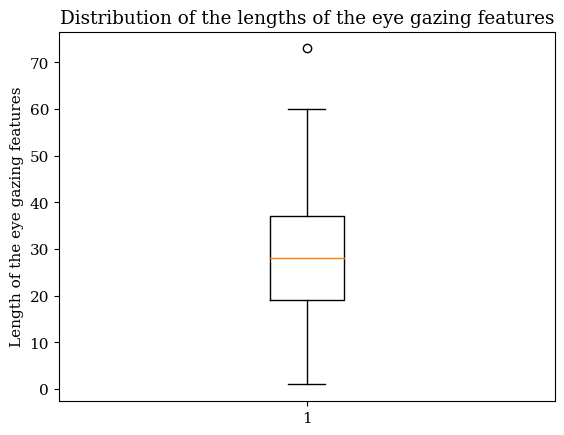

In [25]:
#We visualize the distribution of the lengths of the eye gazing features using a boxplot
plt.boxplot(df['length'])
#Title
plt.title('Distribution of the lengths of the eye gazing features')
#y-axis label
plt.ylabel('Length of the eye gazing features')
#delete the x-axis label
plt.xlabel('')

We only keep the videos with more than 10 frames. 

In [26]:
df = df[df['length'] > 10]
df

,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,VideoFrameHeight,VideoFrameWidth,Confidence1,...,AgeHigh,Gender,GenderConf,Size,openface_key,openpose_jsons_path,openpose_images_path,eye_gazing_features,overall_confidence,length
1,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,sourire_4me2@att.net__Gabriella,1,11.0,Female,89.1,24.0,360.0,480.0,99.8,...,28.8,Female,97.6,0.046882,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,_REVIEWED/Testing_ProcessComplete/sourire_4me2...,"[[0.24689499999999998, -0.000195, -0.969042, 0...",0.880000,22
2,_REVIEWED/Testing_ProcessComplete/odaliscorder...,odaliscordero@gmail.com__Sarah,0,2.0,Female,88.6,25.0,360.0,480.0,99.0,...,9.2,Female,98.5,0.185876,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,GuessWhat/_REVIEWED/Testing_ProcessComplete/od...,"[[-0.396104, 0.162703, -0.903676, -0.558342, 0...",0.958966,29
3,annaseemayer@yahoo.co.uk/1591439040/GuessWhat.mp4,annaseemayer@yahoo.co.uk__Catherine,0,7.0,Female,94.6,25.0,360.0,480.0,99.1,...,40.0,Female,99.4,0.284316,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,GuessWhat/annaseemayer@yahoo.co.uk/1591439040/...,"[[0.145224, -0.29078899999999996, -0.945702, -...",0.921034,29
4,tami_mcin@hotmail.com/1587233613/GuessWhat.mp4,tami_mcin@hotmail.com__Adrian,1,7.0,Male,107.5,25.0,360.0,480.0,99.9,...,18.8,Male,94.0,0.250136,GuessWhat/tami_mcin@hotmail.com/1587233613/Ope...,GuessWhat/tami_mcin@hotmail.com/1587233613/jsons/,GuessWhat/tami_mcin@hotmail.com/1587233613/ima...,"[[0.23503800000000002, -0.148624, -0.960556, -...",0.934898,49
5,_REVIEWED/Testing_ProcessComplete/knitsandgigg...,knitsandgiggles5@gmail.com__Henrik Fotis,1,9.0,Male,88.6,25.0,360.0,480.0,99.7,...,13.6,Female,93.0,0.035860,GuessWhat/_REVIEWED/Testing_ProcessComplete/kn...,GuessWhat/_REVIEWED/Testing_ProcessComplete/kn...,GuessWhat/_REVIEWED/Testing_ProcessComplete/kn...,"[[0.224408, 0.021974, -0.974247, 0.05279, 0.00...",0.911915,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,_REVIEWED/remote_participants/anamontejo%40yah...,anamontejo@yahoo.com.au__Toben,1,6.0,Male,87.3,23.8,720.0,960.0,99.2,...,16.5,Female,87.5,0.094710,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,_REVIEWED/remote_participants/anamontejo%40yah...,"[[0.163576, 0.104179, -0.981015, 0.02110399999...",0.911923,26
292,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,psidhu15@gmail.com__eshar,0,3.0,Female,86.9,30.0,768.0,1024.0,99.9,...,10.3,Female,98.2,0.111147,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,_REVIEWED/Testing_ProcessComplete/psidhu15%40g...,"[[0.394483, -0.12995299999999999, -0.909668, 0...",0.944359,39
293,mrspaine%40yahoo.com/1637525368746/GuessWhat.mp4,mrspaine@yahoo.com__Eden,1,8.0,Female,57.6,29.9,480.0,640.0,100.0,...,18.6,Female,98.8,0.176444,mrspaine%40yahoo.com/1637525368746/OpenFace.csv,mrspaine%40yahoo.com/1637525368746/jsons/,mrspaine%40yahoo.com/1637525368746/images/,"[[-0.12941, -0.232519, -0.963944, -0.246883, -...",0.936296,27
294,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,vesna_tz@yahoo.com__Filip,0,2.0,Male,89.2,24.0,360.0,480.0,99.5,...,8.6,Male,92.7,0.218223,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,_REVIEWED/remote_participants/vesna_tz@yahoo.c...,"[[0.045269, -0.004028, -0.998967, -0.172559, -...",0.898000,15


(array([ 6.,  2.,  3.,  8., 12.,  3.,  6.,  9., 16.,  8.,  7.,  5., 25.,
        10., 10., 18., 11.,  3.,  5.,  6., 11.,  8.,  5.,  7.,  6., 10.,
         4.,  4.,  2., 12.,  4.,  0.,  4.,  2.,  1.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([11.  , 12.24, 13.48, 14.72, 15.96, 17.2 , 18.44, 19.68, 20.92,
        22.16, 23.4 , 24.64, 25.88, 27.12, 28.36, 29.6 , 30.84, 32.08,
        33.32, 34.56, 35.8 , 37.04, 38.28, 39.52, 40.76, 42.  , 43.24,
        44.48, 45.72, 46.96, 48.2 , 49.44, 50.68, 51.92, 53.16, 54.4 ,
        55.64, 56.88, 58.12, 59.36, 60.6 , 61.84, 63.08, 64.32, 65.56,
        66.8 , 68.04, 69.28, 70.52, 71.76, 73.  ]),
 <BarContainer object of 50 artists>)

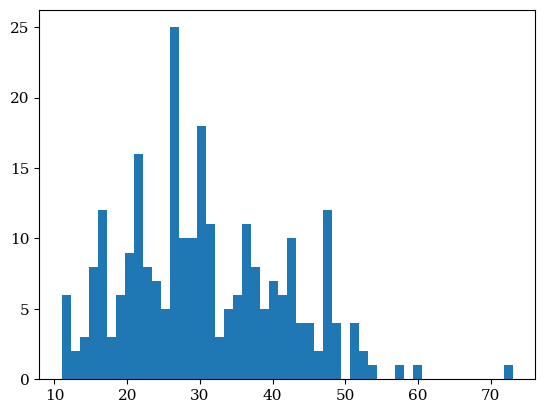

In [33]:
#Histogram of the lengths of the eye gazing features
#Color 'ASD' in red and 'NT' in blue
plt.hist(df['length'], bins=50)

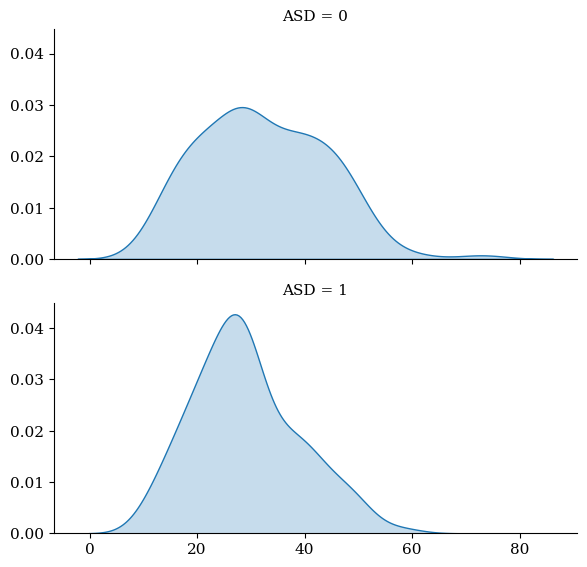

In [38]:
# Assume df is your DataFrame and 'length' is your column of interest.
g = sns.FacetGrid(df, row='ASD', height=3, aspect=2)  # 'ColumnB' is the column with unique values for which you want separate plots
g.map(sns.kdeplot, 'length', shade=True)  # 'ColumnA' is the column for which you want KDE plots

# Optional: remove the axis labels
g.set_axis_labels("", "")

plt.show()

## We Visualize the Confidence

Text(0, 0.5, 'Confidence')

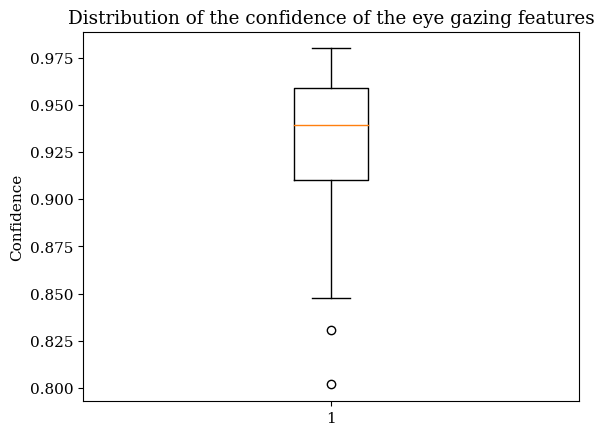

In [39]:
#We visualize the distribution of the confidence of the eye gazing features using a boxplot
plt.boxplot(df['overall_confidence'])
#Title
plt.title('Distribution of the confidence of the eye gazing features')
#Y-axis label
plt.ylabel('Confidence')

## We Save Our Final Dataset

In [13]:
#We save the dataframe
df.to_csv('../data/dataset_balanced_gaze_final_v3.csv', index=False)